# Visualization functions WIP

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import pandas as pd
import numpy as np
from src.safegraph_eval.plotting import plotting

In [5]:
# ingest sample Monthly Patterns data from lowe's for 2021 Jan to Sep downloaded from shop
# https://shop.safegraph.com/?brands=SG_BRAND_4f8a39fb928268edb1ab256922e436d7&countries=US&poi=ALL&tab=datasets&cart=sg_p-202100-202108
patterns = pd.DataFrame()
for month in range(1,10,1):
    _ = pd.read_csv(f"data/Lowes-PATTERNS-2021_0{month}-2021-10-28/patterns.csv")
    patterns = patterns.append(_,ignore_index=True)

In [6]:
display(patterns.head()) # each row is Patterns data for a Lowe's POI for a specific month

,placekey,parent_placekey,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,...,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,222-222@5wg-42f-5vf,NaN,Lowe's,925 E 17th St,Idaho Falls,ID,83404,SG_BRAND_4f8a39fb928268edb1ab256922e436d7,Lowe's,2021-01-01T00:00:00-07:00,...,"{""160199705011"":39,""160199704031"":36,""16051960...","{""US"":1090}",13121.0,21.0,"{""<5"":36,""5-10"":434,""11-20"":500,""21-60"":731,""6...","{""The Home Depot"":15,""Walmart"":13,""Sam's Club""...","{""Walmart"":70,""The Home Depot"":39,""McDonald's""...","[21,19,15,14,10,13,17,71,139,168,233,304,319,3...","{""Monday"":211,""Tuesday"":196,""Wednesday"":205,""T...","{""android"":739,""ios"":384}"
1,222-222@5r8-dy2-vvf,NaN,Lowe's,2205 SE Adams Blvd,Bartlesville,OK,74006,SG_BRAND_4f8a39fb928268edb1ab256922e436d7,Lowe's,2021-01-01T00:00:00-06:00,...,"{""401139400033"":8,""401139400041"":7,""4014700050...","{""US"":106}",13246.0,24.0,"{""<5"":5,""5-10"":38,""11-20"":34,""21-60"":59,""61-12...","{""Russell Cellular"":30,""Walmart"":13,""QuikTrip""...","{""Walmart"":72,""Russell Cellular"":65,""Sonic"":45...","[6,6,6,4,3,3,11,15,25,36,31,34,42,36,38,30,23,...","{""Monday"":27,""Tuesday"":28,""Wednesday"":31,""Thur...","{""android"":99,""ios"":12}"
2,zzw-222@8g7-nkk-zfz,NaN,Lowe's,3341 Lexington Rd,Athens,GA,30605,SG_BRAND_4f8a39fb928268edb1ab256922e436d7,Lowe's,2021-01-01T00:00:00-05:00,...,"{""132219602023"":60,""132219602013"":54,""13221960...","{""US"":1295}",16266.0,21.0,"{""<5"":59,""5-10"":482,""11-20"":556,""21-60"":849,""6...","{""Walmart"":11,""Kroger"":5,""Goodwill Industries""...","{""Walmart"":59,""Chick-fil-A"":42,""Kroger"":41,""Mc...","[40,42,40,46,54,66,72,100,189,247,348,364,376,...","{""Monday"":271,""Tuesday"":255,""Wednesday"":275,""T...","{""android"":641,""ios"":692}"
3,zzw-222@3bt-by7-2c5,NaN,Lowe's,333 E Tudor Rd,Anchorage,AK,99503,SG_BRAND_4f8a39fb928268edb1ab256922e436d7,Lowe's,2021-01-01T00:00:00-09:00,...,"{""020200023011"":12,""020200018024"":10,""02020000...","{""US"":459}",6470.0,21.0,"{""<5"":14,""5-10"":187,""11-20"":196,""21-60"":290,""6...","{""The Home Depot"":11,""Walmart"":8,""Holiday Stat...","{""Walmart"":48,""Costco"":48,""The Home Depot"":40,...","[5,6,6,7,7,13,34,41,72,74,91,113,154,146,113,1...","{""Monday"":93,""Tuesday"":100,""Wednesday"":120,""Th...","{""android"":226,""ios"":250}"
4,222-222@8sz-9cw-bc5,NaN,Lowe's,605 SW H K Dodgen Loop,Temple,TX,76502,SG_BRAND_4f8a39fb928268edb1ab256922e436d7,Lowe's,2021-01-01T00:00:00-06:00,...,"{""480270213031"":94,""480270203002"":84,""48027020...","{""US"":1961}",13110.0,22.0,"{""<5"":75,""5-10"":786,""11-20"":817,""21-60"":1404,""...","{""Walmart"":13,""H-E-B"":8,""The Home Depot"":8,""CE...","{""Walmart"":69,""H-E-B"":61,""CEFCO"":44,""McDonald'...","[58,58,64,62,65,90,110,175,299,416,563,642,696...","{""Monday"":479,""Tuesday"":409,""Wednesday"":392,""T...","{""android"":1062,""ios"":972}"


In [6]:
patterns["date_range_start"].value_counts().head(9) #shows data from all 9 months

2021-08-01T00:00:00-04:00    946
2021-09-01T00:00:00-04:00    944
2021-07-01T00:00:00-04:00    941
2021-04-01T00:00:00-04:00    939
2021-06-01T00:00:00-04:00    938
2021-05-01T00:00:00-04:00    938
2021-01-01T00:00:00-05:00    938
2021-03-01T00:00:00-05:00    937
2021-02-01T00:00:00-05:00    937
Name: date_range_start, dtype: int64

In [7]:
# Typical procedure is to join with internal ground truth data to compare Patterns Visits data. 
# For this example though, we will create a new column based on Visits with noise added to it for demonstration purposes.
noise = np.random.normal(100,1000, size=(len(patterns))).astype(int)
groundtruth_data = abs( patterns["raw_visit_counts"] + noise )
groundtruth_data.rename("groundtruth_data",inplace=True)

display(groundtruth_data)

0        2745
1         184
2        2374
3         822
4        4733
         ... 
15261    3489
15262    4138
15263    4133
15264     767
15265    2503
Name: groundtruth_data, Length: 15266, dtype: int64

In [8]:
comparison_df = pd.concat([patterns["raw_visit_counts"],groundtruth_data], axis=1)
display(comparison_df)

,raw_visit_counts,groundtruth_data
0,1957,2745
1,184,184
2,2265,2374
3,806,822
4,3747,4733
...,...,...
15261,1309,3489
15262,2770,4138
15263,3218,4133
15264,1021,767


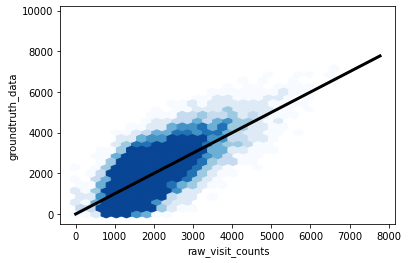

In [9]:
plotting.plot_hexbin(comparison_df, "groundtruth_data")